# Données des présidentielles de 1965 à 2012
## Importation et exploration des données

In [144]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/h4r1c0t/WildCodeSchool/master/Project/Datathon%231/data_pres_1965-2012.csv',
                index_col=False)
df['Année'] = df['Date'].apply(lambda x: x[:4])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(df['Date'], inplace = True)
df.drop(columns = 'Date', inplace = True)

In [132]:
df.shape

(48372, 11)

In [ ]:
df.info()

In [134]:
df.head()

Code département département circonscription  Inscrits  Votants  \
Date                                                                         
1965-12-05                1         AIN               1   68818.0  54262.0   
1965-12-05                1         AIN               2   70186.0  57221.0   
1965-12-05                1         AIN               3   67492.0  55503.0   
1965-12-05                2       AISNE               1   52618.0  46064.0   
1965-12-05                2       AISNE               2   68770.0  59908.0   

            Exprimés  Blancs et nuls    Score       Candidats  Tour Année  
Date                                                                       
1965-12-05   53769.0           493.0  11669.0  LECANUET (MRP)   1.0  1965  
1965-12-05   56780.0           441.0   7936.0  LECANUET (MRP)   1.0  1965  
1965-12-05   55006.0           497.0  10811.0  LECANUET (MRP)   1.0  1965  
1965-12-05   45564.0           500.0   7242.0  LECANUET (MRP)   1.0  1965  
1965-12-05   59145.0           763.0   8066.0  LECANUET (MRP)   1.0  1965

In [135]:
df.tail()

Code département département circonscription  Inscrits   Votants  \
Date                                                                          
2012-05-06               95  VAL-D'OISE               1  116492.0  101867.0   
2012-05-06               95  VAL-D'OISE               2   88572.0   76804.0   
2012-05-06               95  VAL-D'OISE               3   68462.0   57233.0   
2012-05-06               95  VAL-D'OISE               4  107816.0   93268.0   
2012-05-06               95  VAL-D'OISE               5  152501.0  129716.0   

            Exprimés  Blancs et nuls    Score                Candidats  Tour  \
Date                                                                           
2012-05-06   98727.0          3140.0  45178.0  GISCARD D'ESTAING (UDF)   2.0   
2012-05-06   74415.0          2389.0  34047.0  GISCARD D'ESTAING (UDF)   2.0   
2012-05-06   55549.0          1684.0  18739.0  GISCARD D'ESTAING (UDF)   2.0   
2012-05-06   90150.0          3118.0  45051.0  GISCARD D'ESTAING (UDF)   2.0   
2012-05-06  125358.0          4358.0  48709.0  GISCARD D'ESTAING (UDF)   2.0   

           Année  
Date              
2012-05-06  2012  
2012-05-06  2012  
2012-05-06  2012  
2012-05-06  2012  
2012-05-06  2012

## Calcul du taux de votants et d'abstention

In [136]:
df['Votants (%)'] = round(df['Votants'] / df['Inscrits'] * 100, 2)
df['Abstention (%)'] = 100 - df['Votants (%)']

In [137]:
df.head()

Code département département circonscription  Inscrits  Votants  \
Date                                                                         
1965-12-05                1         AIN               1   68818.0  54262.0   
1965-12-05                1         AIN               2   70186.0  57221.0   
1965-12-05                1         AIN               3   67492.0  55503.0   
1965-12-05                2       AISNE               1   52618.0  46064.0   
1965-12-05                2       AISNE               2   68770.0  59908.0   

            Exprimés  Blancs et nuls    Score       Candidats  Tour Année  \
Date                                                                        
1965-12-05   53769.0           493.0  11669.0  LECANUET (MRP)   1.0  1965   
1965-12-05   56780.0           441.0   7936.0  LECANUET (MRP)   1.0  1965   
1965-12-05   55006.0           497.0  10811.0  LECANUET (MRP)   1.0  1965   
1965-12-05   45564.0           500.0   7242.0  LECANUET (MRP)   1.0  1965   
1965-12-05   59145.0           763.0   8066.0  LECANUET (MRP)   1.0  1965   

            Votants (%)  Abstention (%)  
Date                                     
1965-12-05        78.85           21.15  
1965-12-05        81.53           18.47  
1965-12-05        82.24           17.76  
1965-12-05        87.54           12.46  
1965-12-05        87.11           12.89

### Visualisation des taux
#### Globalité

In [141]:
df_tx_glob = df.groupby(by = ['Année', 'Tour']).mean().reset_index()

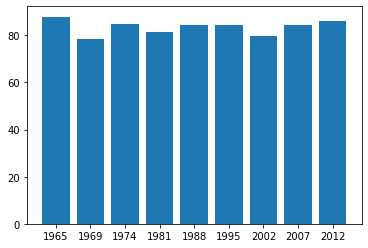

In [145]:
_ = plt.bar('Année', 'Votants (%)', data = df_tx_glob)

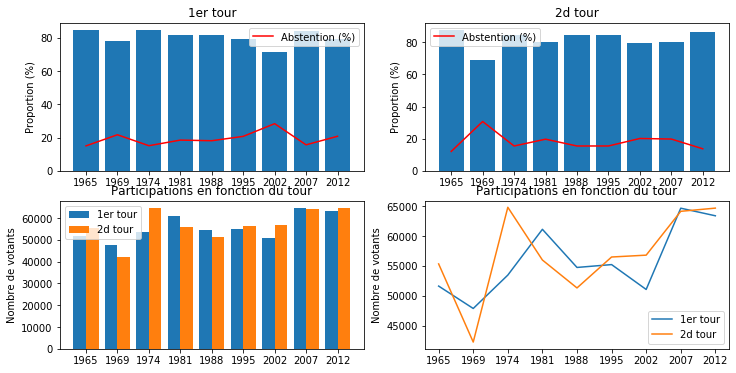

In [169]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize = (12, 6))
ax1 = plt.subplot(221)
ax1.bar('Année', 'Votants (%)', data = df_tx_glob[df_tx_glob['Tour'] == 1])
ax1.plot('Année', 'Abstention (%)', data = df_tx_glob[df_tx_glob['Tour'] == 1], color = 'r')
ax1.set_title('1er tour')
ax1.set_ylabel('Proportion (%)')
ax1.legend()

ax2 = plt.subplot(222)
ax2.bar('Année', 'Votants (%)', data = df_tx_glob[df_tx_glob['Tour'] == 2])
ax2.plot('Année', 'Abstention (%)', data = df_tx_glob[df_tx_glob['Tour'] == 2], color = 'r')
ax2.set_title('2d tour')
ax2.set_ylabel('Proportion (%)')
ax2.legend()

ax3 = plt.subplot(223)
ax3.bar('Année', 'Votants', data = df_tx_glob[df_tx_glob['Tour'] == 1], width = -.4, align='edge', label = '1er tour')
ax3.bar('Année', 'Votants', data = df_tx_glob[df_tx_glob['Tour'] == 2], width = .4, align='edge', label = '2d tour')
ax3.set_title('Participations en fonction du tour')
ax3.set_ylabel('Nombre de votants')
ax3.legend()

ax4 = plt.subplot(224)
ax4.plot('Année', 'Votants', data = df_tx_glob[df_tx_glob['Tour'] == 1], label = '1er tour')
ax4.plot('Année', 'Votants', data = df_tx_glob[df_tx_glob['Tour'] == 2], label = '2d tour')
ax4.set_title('Participations en fonction du tour')
ax4.set_ylabel('Nombre de votants')
ax4.legend()

plt.show()